# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(50)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 150

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [6]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [7]:
ip_reservoir.pre_train(X_TR, eta=0.000015, epochs=15,  learning_rule="online", verbose=True) #16

- Epoch: 1) | KL Divergence value: 2614.93310546875.
- Epoch: 2) | KL Divergence value: 2554.070556640625.
- Epoch: 3) | KL Divergence value: 2495.422119140625.
- Epoch: 4) | KL Divergence value: 2439.227294921875.
- Epoch: 5) | KL Divergence value: 2385.673095703125.
- Epoch: 6) | KL Divergence value: 2334.8779296875.
- Epoch: 7) | KL Divergence value: 2286.88623046875.
- Epoch: 8) | KL Divergence value: 2241.69091796875.
- Epoch: 9) | KL Divergence value: 2199.2353515625.
- Epoch: 10) | KL Divergence value: 2159.4326171875.
- Epoch: 11) | KL Divergence value: 2122.179443359375.
- Epoch: 12) | KL Divergence value: 2087.36474609375.
- Epoch: 13) | KL Divergence value: 2054.873291015625.
- Epoch: 14) | KL Divergence value: 2024.5911865234375.
- Epoch: 15) | KL Divergence value: 1996.409912109375.


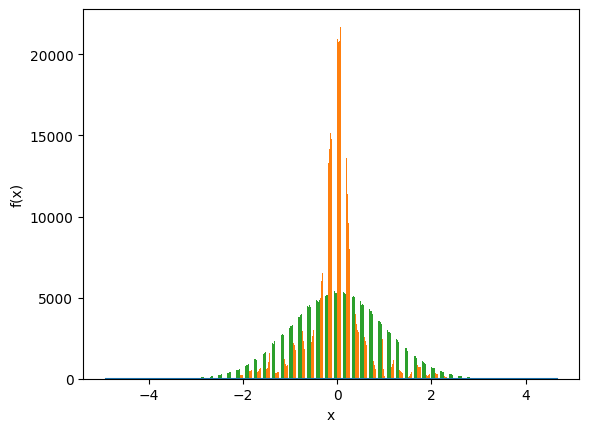

In [8]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [9]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.14628565311431885)  ACTUAL_STD == (0.0690157413482666)][ TARGET_MEAN == (0.020063180476427078) TARGET_STD == (1.0186735391616821)]
Unit - (2): [ ACTUAL_MEAN == (-0.20720809698104858)  ACTUAL_STD == (0.043084822595119476)][ TARGET_MEAN == (0.007852124981582165) TARGET_STD == (0.992304801940918)]
Overall network: [ACTUAL_MEAN == (-0.024504901841282845)  ACTUAL_STD == (0.5817177891731262)]


## BIMODAL MIXTURE OF GAUSSIAN

In [10]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [11]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=15,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3491.8056640625.
- Epoch: 2) | KL Divergence value: 3222.05908203125.
- Epoch: 3) | KL Divergence value: 2974.505615234375.
- Epoch: 4) | KL Divergence value: 2751.16552734375.
- Epoch: 5) | KL Divergence value: 2552.931884765625.
- Epoch: 6) | KL Divergence value: 2379.71337890625.
- Epoch: 7) | KL Divergence value: 2230.62548828125.
- Epoch: 8) | KL Divergence value: 2104.2236328125.
- Epoch: 9) | KL Divergence value: 1998.7086181640625.
- Epoch: 10) | KL Divergence value: 1912.0943603515625.
- Epoch: 11) | KL Divergence value: 1842.36328125.
- Epoch: 12) | KL Divergence value: 1787.564697265625.
- Epoch: 13) | KL Divergence value: 1745.93603515625.
- Epoch: 14) | KL Divergence value: 1715.99365234375.
- Epoch: 15) | KL Divergence value: 1696.636474609375.


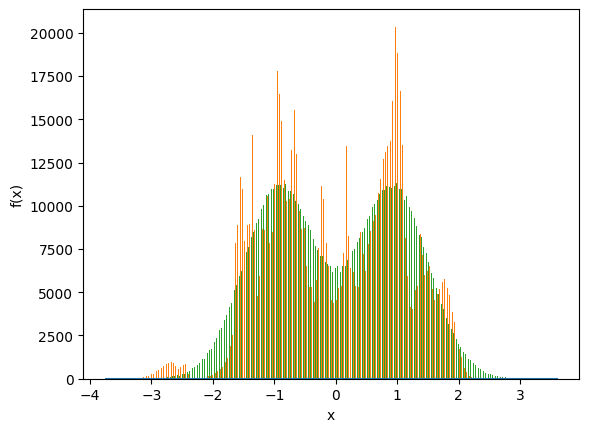

In [12]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [13]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.6576443314552307)  ACTUAL_STD == (0.04816433787345886)][ TARGET_MEAN == (-0.9252151846885681) TARGET_STD == (0.5721548199653625)]
Unit - (2): [ ACTUAL_MEAN == (0.657672107219696)  ACTUAL_STD == (0.02916269563138485)][ TARGET_MEAN == (0.9184851050376892) TARGET_STD == (0.5793741345405579)]
Overall network: [ACTUAL_MEAN == (-0.0018890972714871168)  ACTUAL_STD == (1.069084644317627)]


## EVAUALTUION IN ESN

In [14]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.reservoir.reset_initial_state()
ip_esn.reservoir.reset_initial_state()
bimodal_esn.reservoir.reset_initial_state()

simple_esn.train(X_TR, Y_TR, 0)
ip_esn.train(X_TR, Y_TR, 0)
bimodal_esn.train(X_TR, Y_TR, 0)


Reservoir warmed up with the first 100 time steps


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.24609375, 0.21875   , 0.23046875, ..., 0.2734375 , 0.2578125 ,
       0.2421875 ], dtype=float32)

### COMPARISON ON TEST DATA

In [15]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02317203434092829


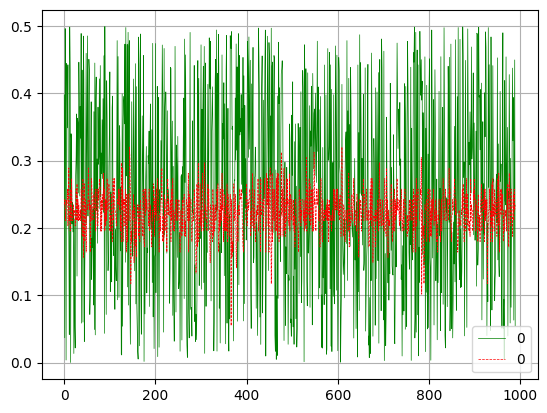

In [16]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02167132841318005


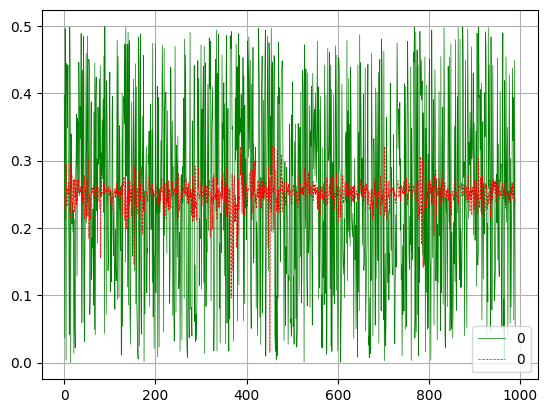

In [17]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02165144828785853


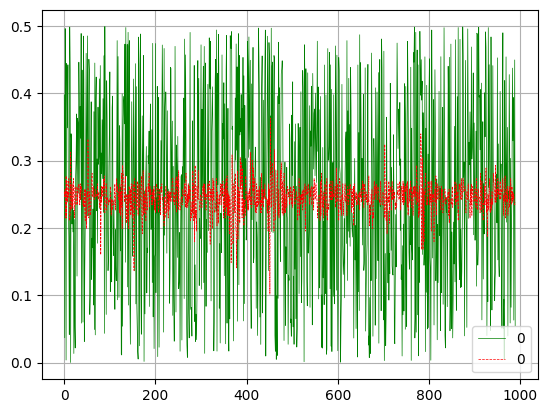

In [18]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [19]:
simple_esn.MemoryCapacity()

tensor(6.8477)

In [20]:
ip_esn.MemoryCapacity()

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.4178e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


tensor(11.4935)

In [21]:
bimodal_esn.MemoryCapacity()

tensor(10.8391)

## LYAPUNOV EXPONENTS

In [22]:
simple_esn.reservoir.LCE(X_TS)

-1.4790655

In [23]:
ip_esn.reservoir.LCE(X_TS)

-0.7291022

In [24]:
bimodal_esn.reservoir.LCE(X_TS)

-1.2837876

## DEVIATION FROM LINEARITY

In [32]:
simple_esn.reservoir.de_fi()

0.5339996716521064

In [33]:
ip_esn.reservoir.de_fi()

0.15280979737600733

In [34]:
bimodal_esn.reservoir.de_fi()

0.311346988767676